<a href="https://colab.research.google.com/github/gcbertachini/Procesemiento_de_imagenes_2Q22/blob/main/PI_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image, ImageShow

def nearest_neighbor(img, size_new):
  size_old = np.array(img.size)
  k_row, k_col =  size_old / size_new
  ii = (np.ceil((np.arange(size_new[0])+1)*k_row)-1).astype(int)
  jj = (np.ceil((np.arange(size_new[1])+1)*k_col)-1).astype(int)

  img_new = np.asarray(img)[:,ii][jj,:]
  return img_new

# Ejercicio 1

In [ ]:
s = 1.5   #mm
a = s*s   #mm^2
d = 15e4  #u/mm^2
conos = a*d #u
cono = 1/d  #mm^2
lado_cono = np.sqrt(cono)

In [ ]:
size_min_retina = lado_cono
dist_retina = 17  #mm
dist_lcd = 300  #mm
size_min_lcd = size_min_retina/dist_retina*dist_lcd
print("{:e}".format(size_min_lcd) + " mm")

4.556451e-02 mm


# Ejercicio 2

In [ ]:
f = 35    #mm
area = 10*10 #mm^2
res = 1e6 #pix
dist = 1000  #mm

In [ ]:
size_pix = area/res #mm2
side_pix = np.sqrt(size_pix)  #mm
size_img = size_pix/f*dist    #mm
print("{:e}".format(size_img) + " mm")

2.857143e-03 mm


#Ejercicio 3

Samsung Galaxy S9+:

https://www.samsung.com/sg/support/mobile-devices/everything-you-need-to-know-about-your-samsung-galaxy-s9-and-s9-plus-camera/
- Resolution: 12 Mpi
- Pixel size: 14 um
- Sensor size: 1/2.55''


In [ ]:
dist3 = 500 #mm


# Ejercicio 4

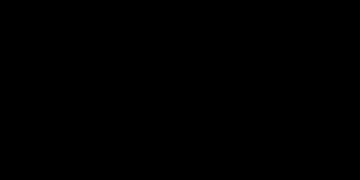

In [ ]:
from PIL import Image, ImageShow
img_size = (360, 180)
im = Image.new("L",img_size)
display(im)

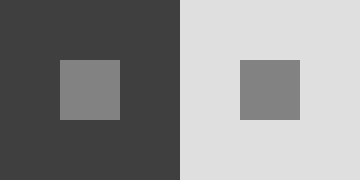

In [ ]:
b = 63
g = 130
w = 223
pix_scale = 30
data1 = np.array([[b,b,b,w,w,w],[b,g,b,w,g,w],[b,b,b,w,w,w]],np.uint8)
data3 = nearest_neighbor(Image.fromarray(data1), img_size)

display(Image.fromarray(data3))

# Ejercicio 5

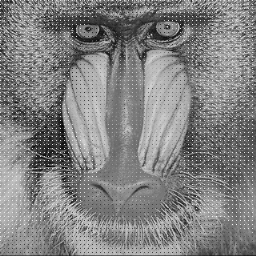

array([[227,  57,  87, ...,  90, 116, 128],
       [114,  83,  71, ..., 117,  86,  64],
       [ 77, 112,  78, ..., 102,  66, 139],
       ...,
       [102, 135, 143, ...,  95,  96,  88],
       [138, 140, 124, ...,  90,  87,  83],
       [ 82,  68,  57, ...,  41,  41,  37]], dtype=uint8)

In [ ]:
mono = Image.open("mono.bmp")
mono.size
mono_data = np.asarray(mono)
display(mono)
display(mono_data)

array([[ 78,  78,  78, ...,  66,  66,  66],
       [ 78,  78,  78, ...,  66,  66,  66],
       [ 78,  78,  78, ...,  66,  66,  66],
       ...,
       [124, 124, 124, ...,  87,  87,  87],
       [124, 124, 124, ...,  87,  87,  87],
       [124, 124, 124, ...,  87,  87,  87]], dtype=uint8)

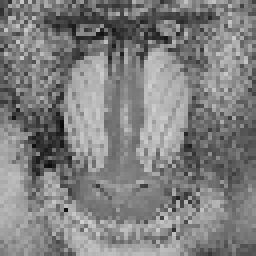

In [ ]:
monoo = mono_data[2::4,2::4]
pix_scale = 4
#monoo = np.repeat(np.repeat(monoo,pix_scale,axis=0),pix_scale,axis=1)

new_size = np.asarray(monoo.shape)*4
monoo = nearest_neighbor(Image.fromarray(monoo),new_size)

display(monoo)
display(Image.fromarray(monoo))

array([[ 78,  78,  78, ...,  66,  66,  66],
       [ 78,  78,  78, ...,  66,  66,  66],
       [ 78,  78,  78, ...,  66,  66,  66],
       ...,
       [124, 124, 124, ...,  87,  87,  87],
       [124, 124, 124, ...,  87,  87,  87],
       [124, 124, 124, ...,  87,  87,  87]], dtype=uint8)

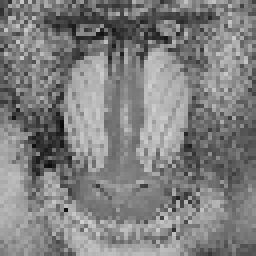

In [ ]:
monooo = mono_data[1::4,1::4]
pix_scale = 4
#monooo = np.repeat(np.repeat(monooo,pix_scale,axis=0),pix_scale,axis=1)

new_size = np.asarray(monooo.shape)*4
monooo = nearest_neighbor(Image.fromarray(monoo),new_size)

display(monooo)
display(Image.fromarray(monooo))

array([[ 87,  87,  87, ..., 111, 111, 111],
       [ 87,  87,  87, ..., 111, 111, 111],
       [ 87,  87,  87, ..., 111, 111, 111],
       ...,
       [111, 111, 111, ...,  73,  73,  73],
       [111, 111, 111, ...,  73,  73,  73],
       [111, 111, 111, ...,  73,  73,  73]], dtype=uint8)

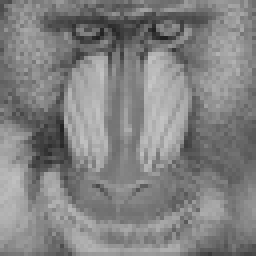

In [ ]:
h,w = mono.size

ans = np.array([],np.uint8)
for i in range(0,h,4):
  for j in range(0,w,4):
    calc = np.uint8(mono_data[i:i+4,j:j+4].mean())
    ans=np.append(ans,calc)

ans = ans.reshape(int(h/4),int(w/4))
pix_scale = 4
#ans = np.repeat(np.repeat(ans,pix_scale,axis=0),pix_scale,axis=1)

new_size = np.asarray(ans.shape)*4
ans = nearest_neighbor(Image.fromarray(ans),new_size)

display(ans)
display(Image.fromarray(ans))

# Funciones de Interpolación

In [ ]:
mono = Image.open("mono.bmp")
mono_data = np.asarray(mono)
#display(mono_data)

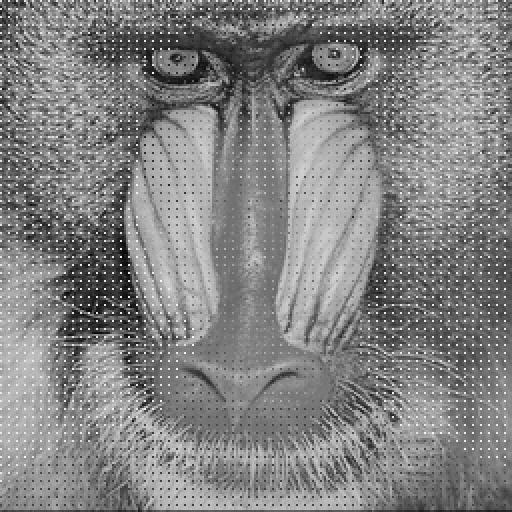

In [ ]:
new_size = np.array(mono.size)*[2,2]
mono_new = nearest_neighbor(mono, new_size)
display(Image.fromarray(mono_new))